# иследование рынка игр

<div class = "alert alert-info" >
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Откройте файл с данными и изучите общую информацию

<div class = "alert alert-info" >
импортируем нужные нам библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

<div class = "alert alert-info" >
открываем фаил и просматриваем информации по нему

In [2]:
try:
    data = pd.read_csv('games.csv' )
except:
    data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()# посмотрим пропуски

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

## Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру);

In [5]:
data.columns = data.columns.str.lower() # переведем названия столбов к нижнему регистру

In [6]:
data.head() # проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class = "alert alert-info" >
удалим пропуски в колонке названия и гор выпуска так как их количество не значительно

In [7]:
data.dropna(subset=['name' , 'year_of_release'], inplace=True) 

In [8]:
print('количество дубликатов:' , data.duplicated().sum()) # проверим дубликаты

количество дубликатов: 0


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [9]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('NaN')
data['user_score'] = data['user_score'].astype('float64')

<div class = "alert alert-info" >
'tbd' - не определено, заменем на пропуски

заменили тип в столбце с годом выпуска на целочисленный, и в столбе с оценкой пользователей для дальнейшего использование в построении графиков

### Обработайте пропуски при необходимости:

In [11]:
data['rating'] = data['rating'].fillna('unknown') # заполним пропуски в столбце с рейтингами заглушками

<div class = "alert alert-info" >
заполняем пропуски только в рейтинге на заглушки остальные пропуски не трогаем если хотим посмотреть реальную оценку датасету, которая может исказиться если заполнить какими либо значениями оченки критиков и пользователей

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [13]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'количество игр')

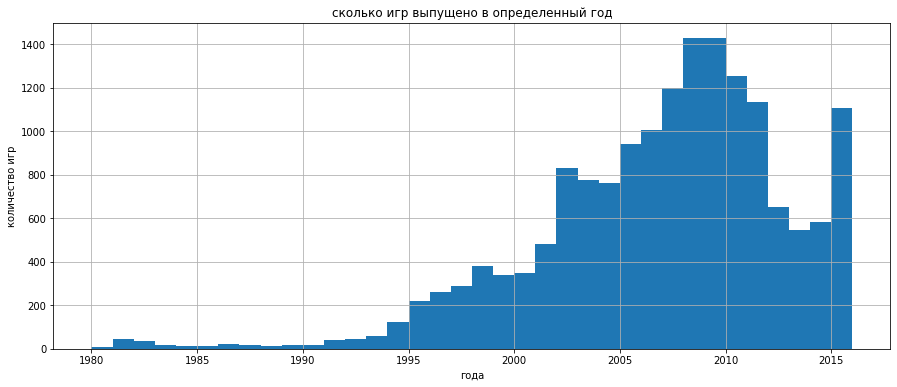

In [14]:
data.hist('year_of_release' , bins = 37, figsize=(15, 6))
plt.title("сколько игр выпущено в определенный год")
plt.xlabel("года")
plt.ylabel("количество игр")

In [15]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


In [16]:
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


<div class = "alert alert-info" >
в среднем количество игр до 1994 года выпускалось не большое, а вот с 1995 года в год начало выходить больше 200 игр и количество выпушенных игр стало рости, пик по данным до 2016 года приходится на 2008-2009 года в последующем спад ну а 2016 год опять привел к увеличению игровой индустрии 

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

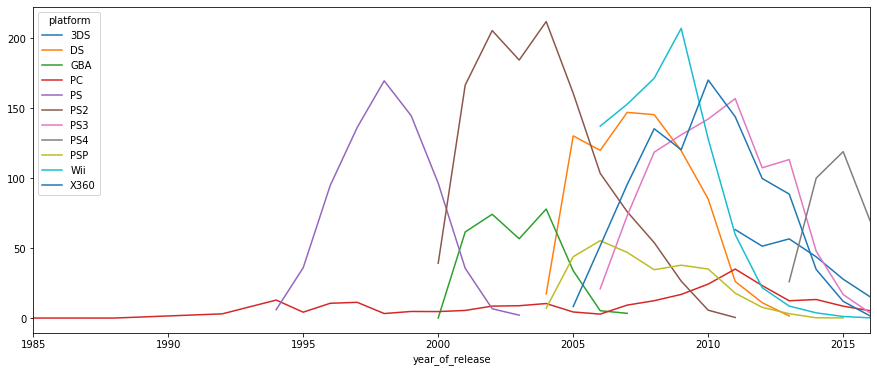

In [17]:
top_11 = data.groupby('platform').agg({'all_sales' : 'sum'}).sort_values(by = 'all_sales').tail(11).index
data.query('platform in @top_11').pivot_table(index='year_of_release', columns = 'platform' , values='all_sales', aggfunc = 'sum').plot(figsize=(15, 6))

In [18]:
min_sales = 5
actual_period = data.groupby(['platform','year_of_release']).agg({'all_sales': 'sum'}).query('all_sales > @min_sales')#platform in @ top_10 and 
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release' : 'count'}) # расчитает жизненный период каждой платформы
actual_period.mean() # расчитает сколько в среднем живет платформа

year_of_release    6.916667
dtype: float64

<div class = "alert alert-info" >
взяли топ 11(для того что бы входил PC) платформ по продажам и пострили графики этих платформ по которым видно, что все игровые платформы быстро взлетают вверх и после этого стабильно быстро падают вниз после чего потдержка данный платформ прекращается, кроме PC там продажи не такие большие как на остальных но за то стабильные и выпускались выпускаются и будут выпускаться.

Средняя жизнь игровых платформ составляет около 7 лет при этом половина жизни они показывают очень хороший результат и стремятся к высокой доходности, а вот второную половину жизни затухат так же быстро как и стремились к высокой доходности 

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

<div class = "alert alert-info" >
актуальный период получается половина жизни платформы + 1 год пока доходность совсем не упала. Так как средняя жизнь платформы около 7 лет тогда возьмем 4 года 

### Не учитывайте в работе данные за предыдущие годы.

In [19]:
games_actual = data.query('2013 <= year_of_release <= 2016' ) 

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [20]:
games_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()

,platform,all_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


In [21]:
top_actual_platforms = games_actual.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales', ascending=False).head(7).index
top_actual_platforms

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC'], dtype='object', name='platform')

<div class = "alert alert-info" >
взяли 7 платформ 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

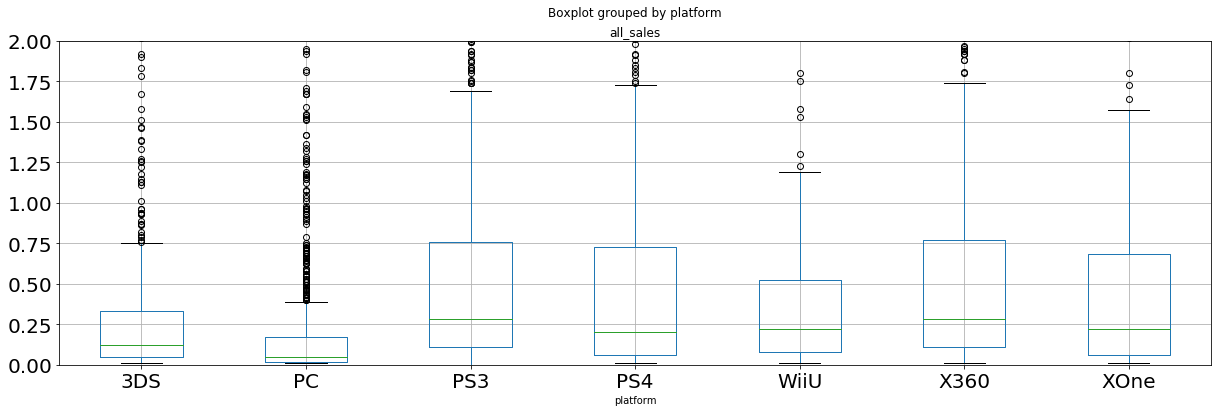

In [22]:
games_query = data.query('platform in @top_actual_platforms')
ax = games_query.boxplot(column='all_sales', by='platform', fontsize=20, figsize=(20,6))
plt.ylim(0,2)
plt.show()

<div class = "alert alert-info" >
самые актуальные платформы это ps3 и ps4 а так же х360 и хone, но это на данный момент и как мы уже выяснили, жизнь таких платформ коротка около 7 лет.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [23]:
platform_ps4 = games_actual[games_actual['platform'] == 'PS4']
display('Кореляция по оценке критиков ' , platform_ps4[['all_sales', 'critic_score']].corr())
display('Кореляция по оценке пользователей' , platform_ps4[['all_sales', 'user_score']].corr())

'Кореляция по оценке критиков '

,all_sales,critic_score
all_sales,1.000000,0.406568
critic_score,0.406568,1.000000


'Кореляция по оценке пользователей'

,all_sales,user_score
all_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


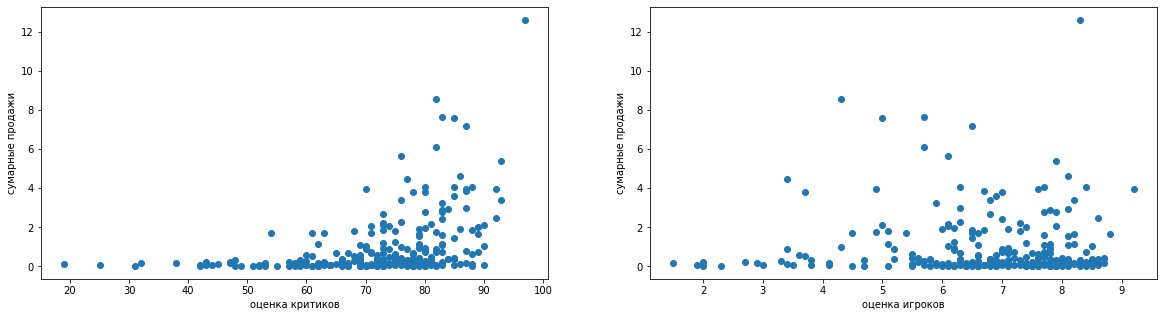

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x = platform_ps4['critic_score'], y = platform_ps4['all_sales'])
ax[0].set_xlabel("оценка критиков")
ax[0].set_ylabel("сумарные продажи")

ax[1].scatter(x = platform_ps4['user_score'], y = platform_ps4['all_sales'])
ax[1].set_xlabel("оценка игроков")
ax[1].set_ylabel("сумарные продажи")
plt.show()


In [25]:
platform_ps4 = platform_ps4[platform_ps4['all_sales'] < platform_ps4['all_sales'].quantile(0.99)]
display('Кореляция по оценке критиков ' , platform_ps4[['all_sales', 'critic_score']].corr())
display('Кореляция по оценке пользователей' , platform_ps4[['all_sales', 'user_score']].corr())

'Кореляция по оценке критиков '

,all_sales,critic_score
all_sales,1.000000,0.400952
critic_score,0.400952,1.000000


'Кореляция по оценке пользователей'

,all_sales,user_score
all_sales,1.000000,-0.036933
user_score,-0.036933,1.000000


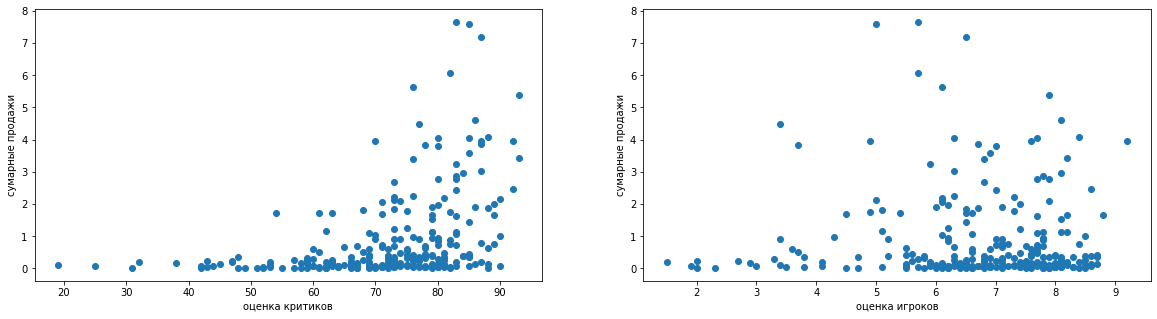

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x = platform_ps4['critic_score'], y = platform_ps4['all_sales'])
ax[0].set_xlabel("оценка критиков")
ax[0].set_ylabel("сумарные продажи")

ax[1].scatter(x = platform_ps4['user_score'], y = platform_ps4['all_sales'])
ax[1].set_xlabel("оценка игроков")
ax[1].set_ylabel("сумарные продажи")
plt.show()


<div class = "alert alert-info" >
оценки критиков в на платформе PS4 влияют на продажи в данной платформе, что не скажешь про оценки пользователей там картина немного иначе, оценка пользователя практически не влияет на общие продажи, даже после чисти выбросов картина не меняется и зачастую у пользователей с малой оценкой идут хорошие продажи 

### Соотнесите выводы с продажами игр на других платформах.

In [27]:
platform_not_ps4 = games_actual[games_actual['platform'] != 'PS4']
display('Кореляция по оценке критиков ' , platform_not_ps4[['all_sales', 'critic_score']].corr())
display('Кореляция по оценке пользователей' , platform_not_ps4[['all_sales', 'user_score']].corr())

'Кореляция по оценке критиков '

,all_sales,critic_score
all_sales,1.000000,0.281251
critic_score,0.281251,1.000000


'Кореляция по оценке пользователей'

,all_sales,user_score
all_sales,1.000000,-0.001122
user_score,-0.001122,1.000000


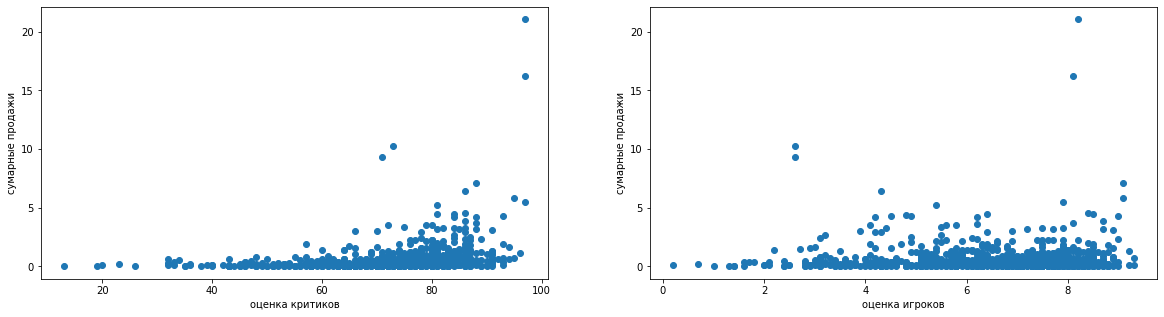

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x = platform_not_ps4['critic_score'], y = platform_not_ps4['all_sales'])
ax[0].set_xlabel("оценка критиков")
ax[0].set_ylabel("сумарные продажи")

ax[1].scatter(x = platform_not_ps4['user_score'], y = platform_not_ps4['all_sales'])
ax[1].set_xlabel("оценка игроков")
ax[1].set_ylabel("сумарные продажи")
plt.show()


In [29]:
platform_not_ps4 = platform_not_ps4[platform_not_ps4['all_sales'] < platform_not_ps4['all_sales'].quantile(0.99)]
display('Кореляция по оценке критиков ' , platform_not_ps4[['all_sales', 'critic_score']].corr())
display('Кореляция по оценке пользователей' , platform_not_ps4[['all_sales', 'user_score']].corr())

'Кореляция по оценке критиков '

,all_sales,critic_score
all_sales,1.000000,0.326905
critic_score,0.326905,1.000000


'Кореляция по оценке пользователей'

,all_sales,user_score
all_sales,1.000000,-0.012402
user_score,-0.012402,1.000000


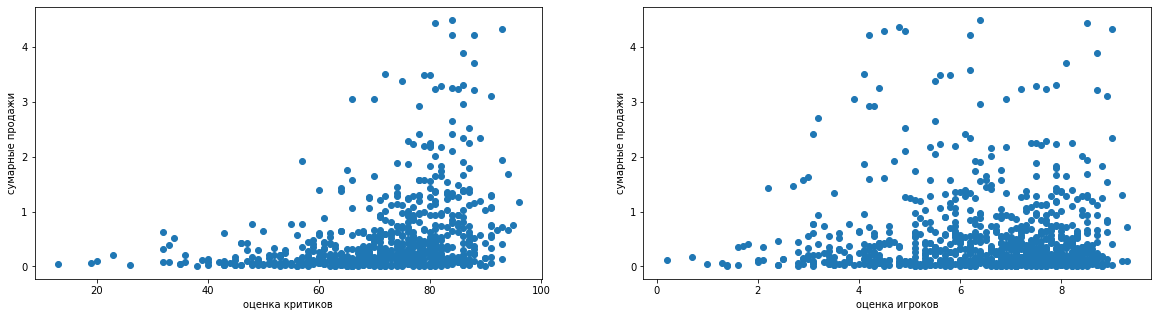

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x = platform_not_ps4['critic_score'], y = platform_not_ps4['all_sales'])
ax[0].set_xlabel("оценка критиков")
ax[0].set_ylabel("сумарные продажи")

ax[1].scatter(x = platform_not_ps4['user_score'], y = platform_not_ps4['all_sales'])
ax[1].set_xlabel("оценка игроков")
ax[1].set_ylabel("сумарные продажи")
plt.show()

<div class = "alert alert-info" >
если сравнивать с остальными актуальными платформами то кореляция примерно такая же как и для PS4, оценки критиков влияют на количество продаж что не скажешь о оценке игроков 

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [31]:
games_actual.groupby('genre')['all_sales'].sum().sort_values(ascending=False).reset_index()

,genre,all_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


In [32]:
games_actual.groupby('genre').agg({'all_sales' : ['median' , 'sum' , 'mean']}).reset_index()

genre all_sales                  
                    median     sum      mean
0         Action     0.110  321.87  0.420196
1      Adventure     0.030   23.64  0.096490
2       Fighting     0.125   35.31  0.441375
3           Misc     0.100   62.82  0.405290
4       Platform     0.225   42.63  0.576081
5         Puzzle     0.060    3.17  0.186471
6         Racing     0.120   39.89  0.469294
7   Role-Playing     0.125  145.89  0.499623
8        Shooter     0.450  232.98  1.245882
9     Simulation     0.100   21.76  0.350968
10        Sports     0.240  150.65  0.703972
11      Strategy     0.080   10.08  0.180000

<div class = "alert alert-info" >
По медиане продаж отчетливо видно что на первом месте медеана продажи шутеров, а на последнем месте приключения, но закрались сомнения что экшены аш на 7 месте и посмотрев на игры и распределения их по жанрам странный датасет в котором фаркрай 4 это шутер хотя как в стиме так и по википедии это экшен, да и впринцепи куча игр не в свой жанр запихнуты.

ну да ладно основная задача у нас выделить жанры с высокими и низкини продажами, а это будут шутеры с самоми высокими продажами и приключения с самами низкини если смотреть по медеане
    
хотя по сумарным продажам экшен на первом месте

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

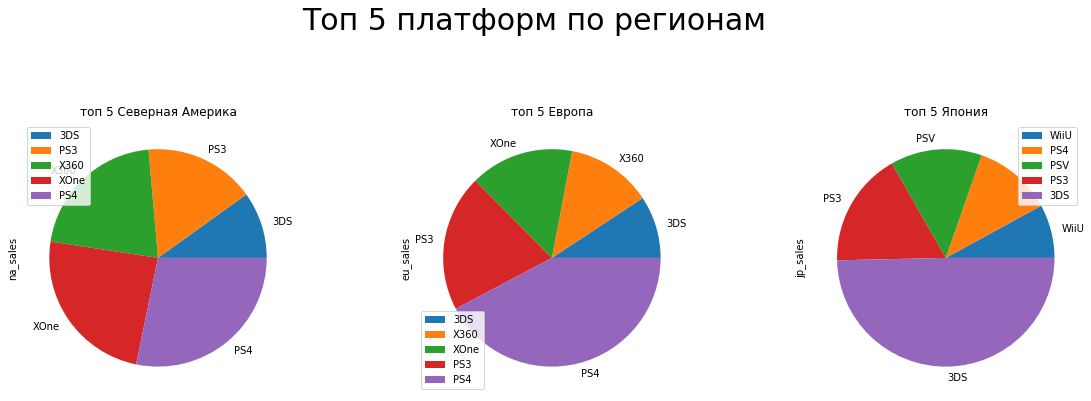

In [33]:
fig, axes = plt.subplots(1, 3)

games_actual.groupby('platform')[['na_sales']].sum().sort_values(by = 'na_sales').tail().plot.pie(subplots = True , ax=axes[0])
games_actual.groupby('platform')[['eu_sales']].sum().sort_values(by = 'eu_sales').tail().plot.pie(subplots = True , ax=axes[1])
games_actual.groupby('platform')[['jp_sales']].sum().sort_values(by = 'jp_sales').tail().plot.pie(subplots = True , ax=axes[2])

fig.suptitle('Топ 5 платформ по регионам',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('топ 5 Северная Америка')
axes[1].set_title('топ 5 Европа')
axes[2].set_title('топ 5 Япония')



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()

In [1]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [35]:
df1 = games_actual.groupby('platform')[['na_sales']].sum().sort_values(by = 'na_sales').tail()
df2 = games_actual.groupby('platform')[['eu_sales']].sum().sort_values(by = 'eu_sales').tail()
df3 = games_actual.groupby('platform')[['jp_sales']].sum().sort_values(by = 'jp_sales').tail()
display_side_by_side(df1,df2,df3, titles=['Северная Америка','Европа', 'Япония'])

,na_sales
platform,
3DS,38.20
PS3,63.50
X360,81.66
XOne,93.12
PS4,108.74
,eu_sales
platform,
3DS,30.96
X360,42.52


<div class = "alert alert-info" >
из актуального времени в северной америке и европе на первом месте ps4 а в японии 3DS

### Самые популярные жанры (топ-5). Поясните разницу.

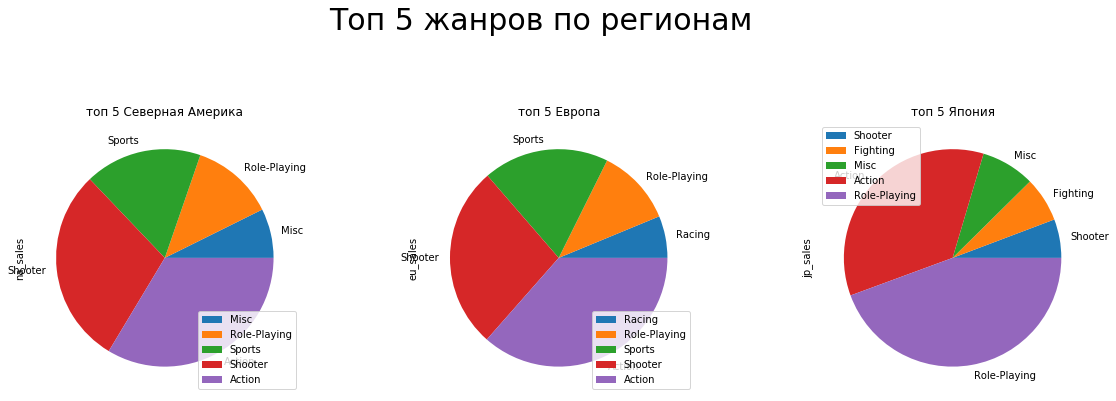

In [36]:
fig, axes = plt.subplots(1, 3)

games_actual.groupby('genre')[['na_sales']].sum().sort_values(by = 'na_sales').tail().plot.pie(subplots = True , ax=axes[0])
games_actual.groupby('genre')[['eu_sales']].sum().sort_values(by = 'eu_sales').tail().plot.pie(subplots = True , ax=axes[1])
games_actual.groupby('genre')[['jp_sales']].sum().sort_values(by = 'jp_sales').tail().plot.pie(subplots = True , ax=axes[2])

fig.suptitle('Топ 5 жанров по регионам',
             y = 1.2,
             fontsize = 30)

axes[0].set_title('топ 5 Северная Америка')
axes[1].set_title('топ 5 Европа')
axes[2].set_title('топ 5 Япония')



fig.set_figheight(5)
fig.set_figwidth(20)

plt.show()

<div class = "alert alert-info" >
северная Америка и Европа очень похожа в популярных жанрах игр, основные там это экшены, шутеры, спортивные игры, что не скажешь про Японию тут же на первом месте ролевые игры  которые занимают большую часть топа а шутеры в Японии только на пятом месте

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

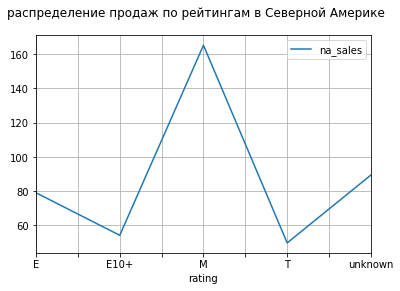

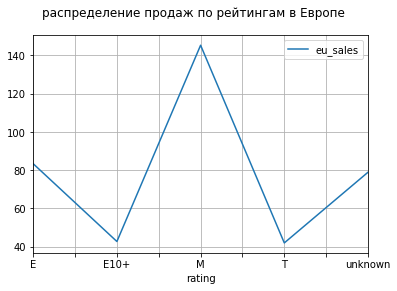

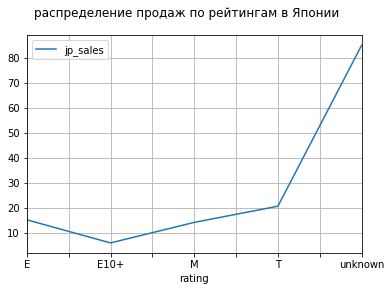

In [37]:
games_actual.pivot_table(index='rating', values='na_sales', aggfunc = 'sum').plot(grid = True)
plt.suptitle('распределение продаж по рейтингам в Северной Америке ')
games_actual.pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').plot(grid = True)
plt.suptitle('распределение продаж по рейтингам в Европе ')
games_actual.pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').plot(grid = True)
plt.suptitle('распределение продаж по рейтингам в Японии ')

plt.show()



<div class = "alert alert-info" >
<h3> Комментарий студента</h3>
самыми популярным рейтингом в северной америке и европе  самый популярный рейтинг 17+(м) в японии столо побольше рейтинг (т) от 13 до 19 но все равно куча пропусков 
</div>

## Проверьте гипотезы


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div class = "alert alert-info" >
$H_0$ Средние пользовательские рейтинги платформ Xbox One и PC равны

$H_1$ Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [38]:
data_xone = games_actual[games_actual['platform'] == 'XOne']['user_score'] 
data_pc = games_actual[games_actual['platform'] == 'PC']['user_score']
data_xone.dropna(inplace=True)
data_pc.dropna(inplace=True)

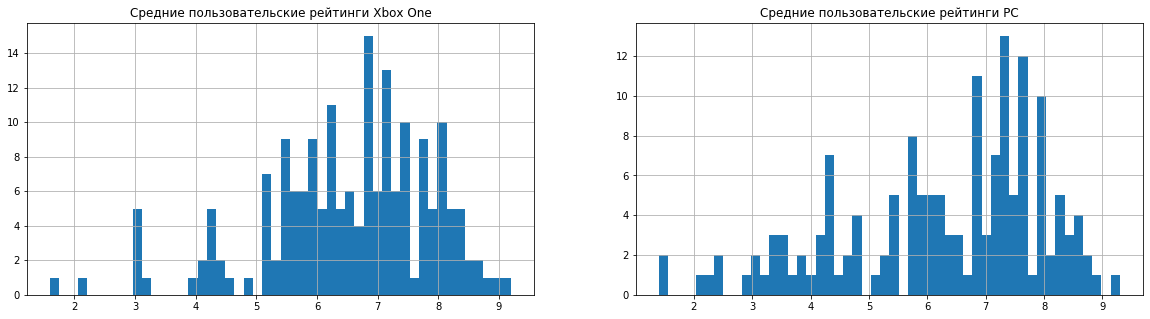

In [39]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

data_xone.hist(bins=50, ax=axes[0])
data_pc.hist(bins=50, ax=axes[1])

axes[0].set_title('Средние пользовательские рейтинги Xbox One')
axes[1].set_title('Средние пользовательские рейтинги PC')
plt.show()

In [40]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(data_xone, data_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


<div class = "alert alert-info" >
взяв актуальный период после проверки гипотезы что средние пользовательские рейтинги платформ Xbox One и PC равны, $H_0$ мы отвергуть не можем так как р-значение около 14%

### Средние пользовательские рейтинги жанров Action  и Sports разные.

<div class = "alert alert-info" >
$H_0$ Средние пользовательские рейтинги жанров Action и Sports  равны

$H_1$ Средние пользовательские рейтинги жанров Action и Sports  не равны

In [41]:
data_action = games_actual[games_actual['genre'] == 'Action']['user_score'] 
data_sports = games_actual[games_actual['genre'] == 'Sports']['user_score']
data_action.dropna(inplace=True)
data_sports.dropna(inplace=True)

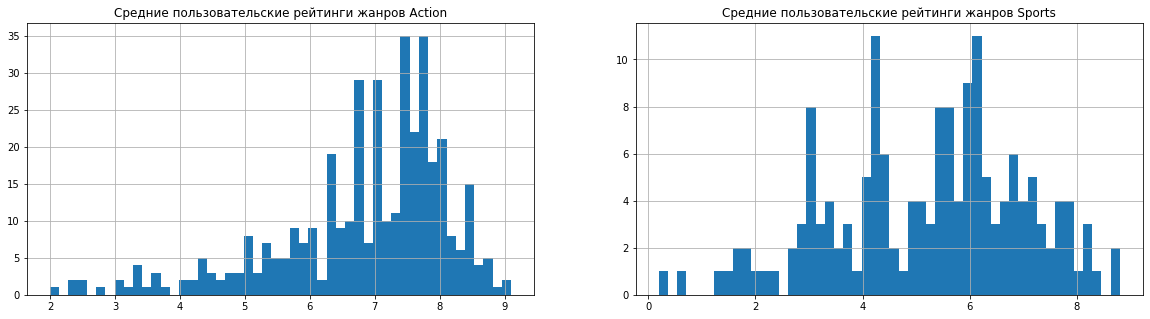

In [42]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

data_action.hist(bins=50, ax=axes[0])
data_sports.hist(bins=50, ax=axes[1])

axes[0].set_title('Средние пользовательские рейтинги жанров Action')
axes[1].set_title('Средние пользовательские рейтинги жанров Sports')
plt.show()

In [43]:
results = st.ttest_ind(data_action, data_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


<div class = "alert alert-info" >
по актуальному периоду картина совершенно другая и в данном случае жанр игры очень влияеет на оценку пользователя в данном случае мы отвергае $H_0$ так как р-значение очень мало
</div>

##  Напишите общий вывод

<div class = "alert alert-info" >
общий вывод заключается в том, что популярность игр зависит от многово, но основные факторы это платформа, жанр, регион продажи, оченки критиков, и рейтинг ESRB. Так что популярность на 2017 год (например) платформа ps4 если же на смену не придет новое поколение ps так как предыдущее поколение быстро покидает рынок, а с нынешней игровой индустрией это происходит очень быстро, жанры по данному датосету (лично мое мнение) только определить нельзя так как распреление жанров по играм не соответствует реальности, но если смотреть по данной выборке по медеане лучше продаются шутеры, а вот экшены пользуются спросом во всех регионах. Каждая страна повернута на свой жанр игр. Самые популярные игры это игры для всех с рейтенгом Е. Ну и как итог для лучших продаж предется потратится на хорошую оценку от критиков. 